In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import cm
from matplotlib.ticker import LinearLocator

# 2. Multivariate normal distribution

> Generate 300 3-dimensional vectors that come from a normal distribution with mean vector as $[1\;2\;1]^t$ and 3x3 covariance matrix as $\begin{bmatrix}5 &0.8& -0.3\\ 0.8 & 3 & 0.6 \\ -0.3 & 0.6 &
4\end{bmatrix}$

In [2]:
mean_vector = np.array([1, 2, 1])
cov_matrix = np.array([[5, 0.8, -0.3], [0.8, 3, 0.6], [-0.3, 0.6, 4]])
vectors = np.random.multivariate_normal(mean_vector, cov_matrix, 300)

> Make scatter plots of x1 vs x2, x1 vs x3, and x2 vs x3. Explain whatever relationships you can gather from these plots.

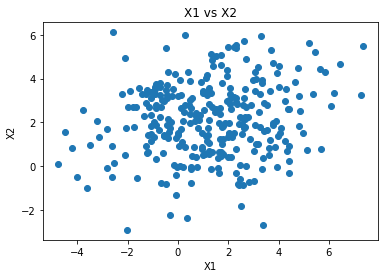

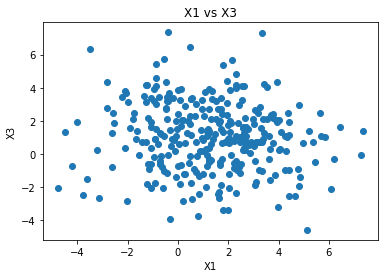

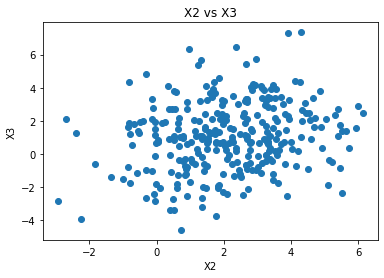

In [3]:
x1 = vectors[:, 0]
x2 = vectors[:, 1]
x3 = vectors[:, 2]
plt.scatter(x1, x2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('X1 vs X2')
plt.show()
plt.scatter(x1, x3)
plt.xlabel('X1')
plt.ylabel('X3')
plt.title('X1 vs X3')
plt.show()
plt.scatter(x2, x3)
plt.xlabel('X2')
plt.ylabel('X3')
plt.title('X2 vs X3')
plt.show()

- From these plot we can't gather much related information between features since they are much random.
- But some info can be gathered.
- From plot 1 between x1 and x2 we can say that x2 is more compact at the higher values of x1.
- Same in plot 2 x3 and x1 are more compact and related each other more at higher values
- But in plot 3 X2 is compact everywhere of x3 values.
- We can also say their range of distribution from the graph.
- But the info gathered here is not much useful anywhere.

> Calculate the mean vector and the covariance matrix using the 300 generated
points.

In [4]:
mean = np.array([x1.mean(), x2.mean(), x3.mean()])
print("Mean of 300 gen points: ", mean)

Mean of 300 gen points:  [1.24815399 2.13530652 1.06467515]


In [5]:
cov = np.cov([x1, x2, x3])
print("Covariance of 300 gen points: ", cov)

Covariance of 300 gen points:  [[ 4.82926199  0.60268791 -0.434333  ]
 [ 0.60268791  2.86735023  0.7128041 ]
 [-0.434333    0.7128041   4.29370257]]


# 3. PIL Library

>In this exercise, you will read an image of your choice using the PIL library, display it, and then convert it to a numpy array.

In [6]:
#Displaying the image
img = Image.open("Data/me.jpeg")
img.show()

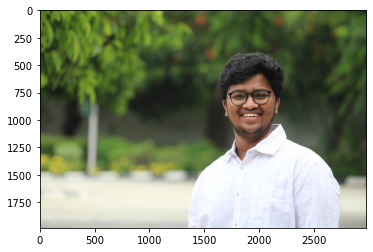

In [7]:
#Converting into numpy array
img_mat = np.asarray(img)
plt.imshow(img_mat)

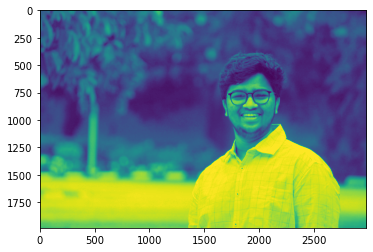

In [8]:
#Selecting red plane of the array
img_red = img_mat[:, :, 0]
plt.imshow(img_red)

> Extracting a 32x32 patch from anywhere of our choice

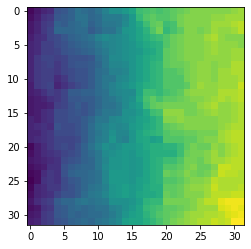

In [9]:
img_patch = img_red[300:332, 300:332]
plt.imshow(img_patch)

> Extract the maximum pixel values along each row and column of the patch

In [10]:
max_row_pixels, max_col_pixels = [], []
for row in img_patch:
    max_row_pixels.append(row.max())
print('Max pixels along rows: ',max_row_pixels)
for i in range(len(img_patch[0])):
    max_col_pixels.append(img_patch[:, i].max())
print('Max pixels along columns: ',max_col_pixels)

Max pixels along rows:  [133, 133, 135, 135, 134, 133, 133, 133, 134, 134, 134, 136, 135, 135, 134, 134, 134, 134, 135, 135, 135, 135, 135, 136, 136, 135, 136, 136, 139, 139, 139, 140]
Max pixels along columns:  [97, 100, 102, 102, 108, 108, 108, 110, 111, 111, 113, 116, 118, 118, 119, 120, 125, 127, 128, 130, 132, 132, 132, 132, 133, 134, 135, 136, 138, 139, 140, 140]


> Generate a new patch whose pixel values are the cosine of the original patch values and display it.

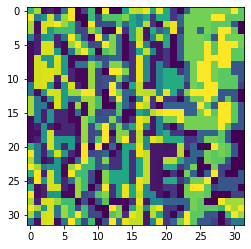

In [11]:
img_cos_patch = np.cos(img_patch)
plt.imshow(img_cos_patch)

# 4. Pandas

> In this exercise, you will create a pandas data frame by reading the data from the link:
https://www.statlearning.com/s/Auto.csv. Using the groupby command, you will calculate the
average mpg for different numbers of cylinders. You will also generate a scatter plot to show the
relationship between the mpg and the displacement.

In [12]:
df = pd.read_csv("Data/Auto.csv")

In [13]:
df.groupby("cylinders")["mpg"].mean()

cylinders
3    20.550000
4    29.317734
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64

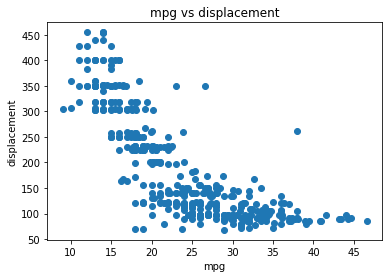

In [14]:
plt.scatter(df["mpg"], df["displacement"])
plt.title("mpg vs displacement")
plt.xlabel("mpg")
plt.ylabel("displacement")
plt.show()

- By observing above graph we can say that mpg and displacement are inversely propotional

# 5. Matplotlib

> You will generate a 3D plot similar to the one shown at "https://matplotlib.org/stable/gallery/mplot3d/surface3d.html#sphx-glr-gallery-mplot3d-
surface3d-py" but with a different surface function of your choice. Feel free to play with different functions (Z function in the link)

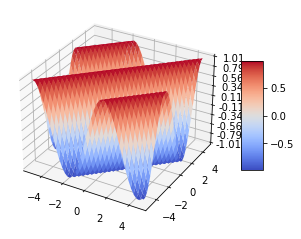

In [15]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = X - Y
Z = np.cos(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()